# Aufgabe 1

$$
det \left( A - \lambda I_2 \right) 
= det \begin{pmatrix} 1-\lambda & 0 \\ 0.5 & 0.5-\lambda \end{pmatrix}
= 0
$$
Da Dreiecksmatrix einfach ablesen. $\Rightarrow \mathcal{L} = {0.5, 1}$

$$
\text{Für } 0.5:
\left( \begin{array}{cc|c} 0.5 & 0 & 0 \\ 0.5 & 0 & 0 \end{array} \right)
\Leftrightarrow
\left( \begin{array}{cc|c} 1 & 0 & 0 \\ 0 & 0 & 0 \end{array} \right)
\Rightarrow v_1 = \begin{pmatrix} 0 \\ x_2 \end{pmatrix}
$$

$$
\text{Für } 1:
\left( \begin{array}{cc|c} 0 & 0 & 0 \\ 0.5 & -0.5 & 0 \end{array} \right)
\Leftrightarrow
\left( \begin{array}{cc|c} 0 & 0 & 0 \\ 1 & -1 & 0 \end{array} \right)
\Rightarrow v_2 = \begin{pmatrix} x_1 \\ x_1 \end{pmatrix}
$$

Es gibt unendlich viele Eigenvektoren.

# Aufgabe 2

In [1]:
google_file = './data/web-Google.txt'
wiki_file = './data/wiki-topcats.txt'

In [2]:
import networkx as nx
from networkx import DiGraph
import matplotlib.pyplot as plt

In [3]:
def read_graph(file):
    with open(file) as f: lines = f.readlines()
    lines = filter(lambda line: not line.startswith('#') and line, lines)
    lines = map(str.split, lines)
    lines = map(lambda l: tuple(map(int, l)), lines)
    return DiGraph(lines)

In [4]:
get_google = lambda: read_graph(google_file)
get_wiki = lambda: read_graph(wiki_file)

In [5]:
def get_neighbors(G, nodes):
    return set.union(*(set(G[n]) for n in nodes))


def depth(G, node, depth=2):
    neighbors = {node}
    for _ in range(depth): neighbors |= get_neighbors(G, neighbors)
    return G.subgraph(neighbors)

In [6]:
def draw_graph(G, start):
    pos = nx.bfs_layout(G, start)
    plt.figure(figsize=(8, 36))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.show()

In [7]:
def top_2_ranks(G):
    ranks = nx.pagerank(G)
    return sorted(ranks.items(), key=lambda x: x[1], reverse=True)[:2]

In [8]:
def aufgabe_2(G, start):
    G = depth(G, start)
    draw_graph(G, start)
    return dict(top_2_ranks(G)), G.number_of_nodes()

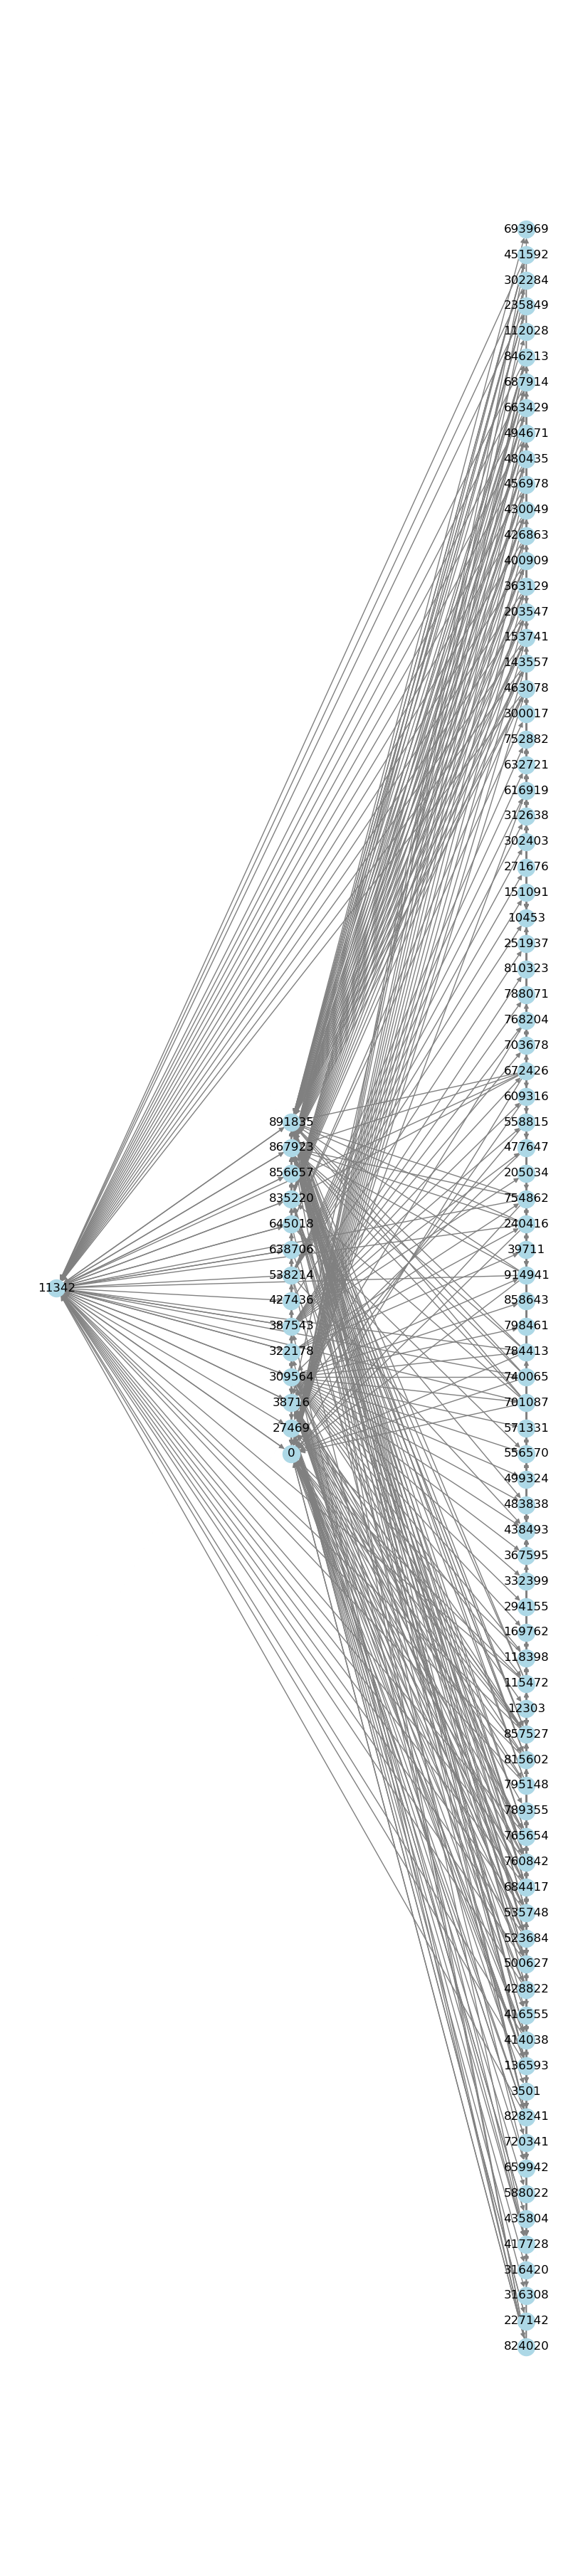

({867923: 0.07182648240251535, 11342: 0.07106493510729514}, 99)

In [9]:
aufgabe_2(get_google(), 11342)

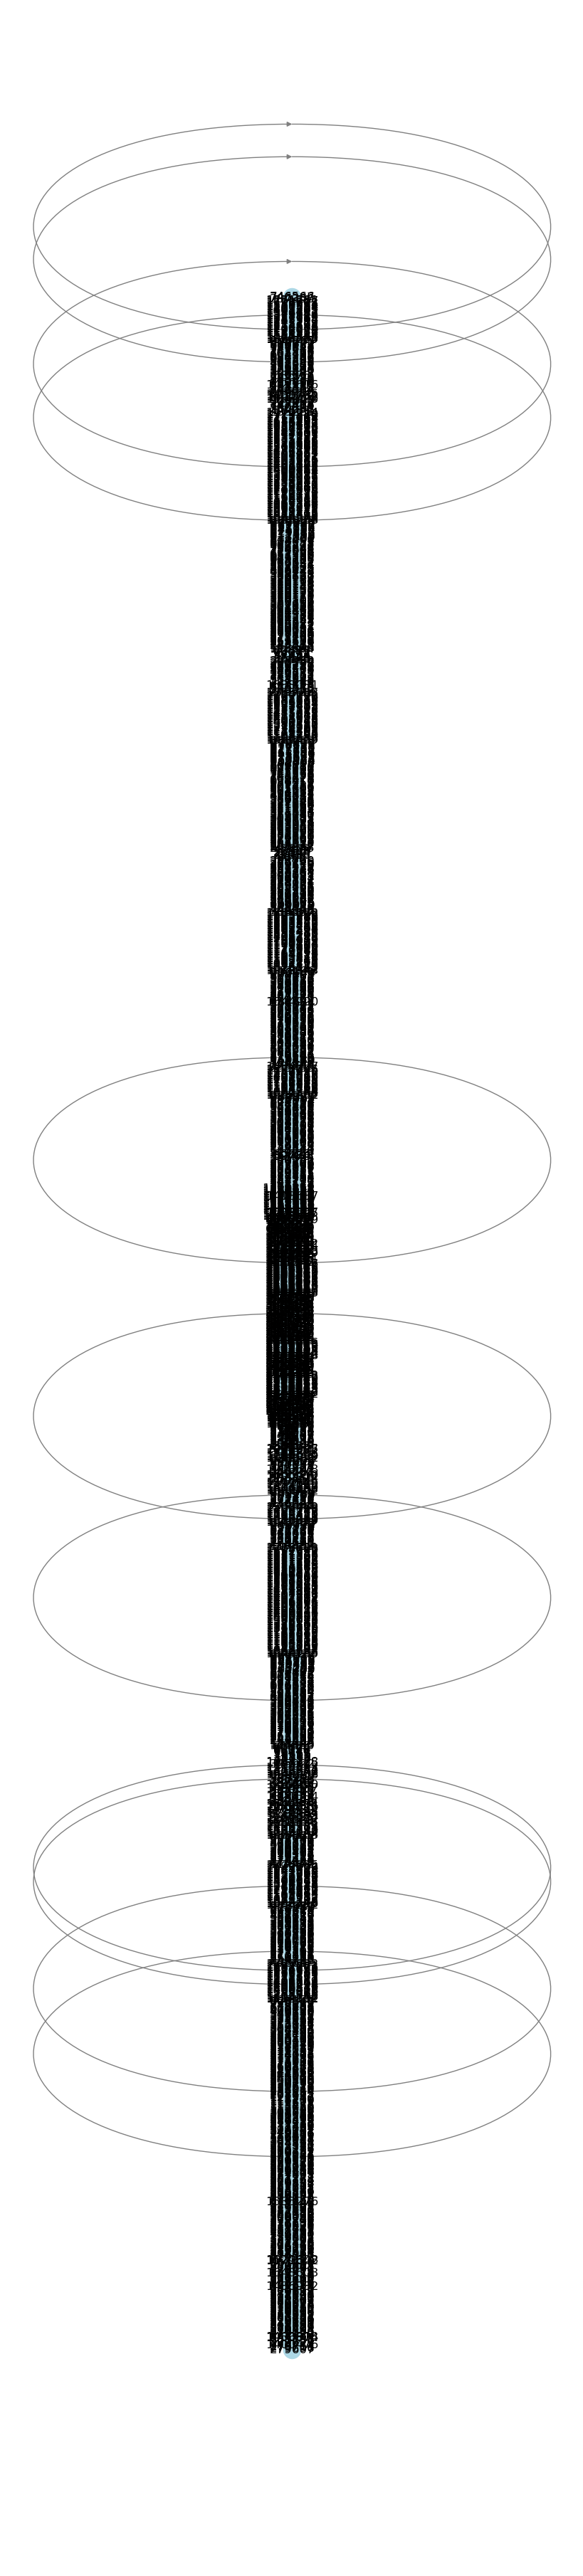

({279122: 0.03955338014884857, 230038: 0.016640872138236583}, 1998)

In [10]:
aufgabe_2(get_wiki(), 46)

# Aufgabe 3

Der Bloom Filter hasht die Einträge der Zielliste in ein Bitarray. Es kann nicht zu falsch 
Negativen kommen, da diese alle Zielinstanzen im Stream auf einem der Hashes landen werden. 
Falsch Positive können dadurch entstehen, dass eine nicht Zielinstanz denselben Hashwert erhält wie
 ein gesuchter Eintrag, bzw. im bei $k$ Hashfunktionen auf $k$ $1$en landet.
 
Gesenkt werden können sie, indem man ein größeres Bitarray verwendet, oder ggf. mehr 
Hashfunktionen. $n/m * ln(2)$ Hashfunktionen sind optimal.

# Aufgabe 4

Uniform Distribution.

Unklar mehrdeutige Frage.